**Contexto**

La siguiente información fue recopilada en el archipiélago de Palmer, cerca de la Antártida. El conjunto de datos proporciona información sobre tres especies de pingüinos, incluidos Adelia, Gentoo y Chinstrap, y cubre métricas biológicas esenciales, como las dimensiones del pico y la masa corporal. El objetivo de la recopilación de información es llevar un registro de estas tres espeices a lo largo del tiempo con el fin de hacer investigaciones relacionadas a su fisiología, biología y ecología. La recopilación de los datos empezó en 2021 y se hará hasta el 2025; la información disponible llega hasta 2023

El estudio se llevó a cabo en 3 islas del aripiélago: Biscoe, Dream, Torgensen


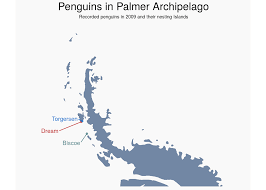

1. Smart Question

¿Cuáles variables relacionadas con la biología y la ecología de 3 especies del género Pygoscelis tienen potencial para la construcción de un modelo predictivo de especie?


2. Obetener los datos

In [316]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC


# scoring data
from sklearn.metrics import accuracy_score


#Paths
extended_path = 'https://raw.githubusercontent.com/Miguelucho-M/AED_experimentation/main/palmerpenguins_extended.csv'
original_path = 'https://raw.githubusercontent.com/Miguelucho-M/AED_experimentation/main/palmerpenguins_original.csv'

Primera visualización de las bases de datos disponibles

In [286]:
# Definir las bases de datos y muestra información de cada una
print("data_original:")
data_original = pd.read_csv(original_path)
data_original.info()
print("\ndata_extended:")
data_extended = pd.read_csv(extended_path)
data_extended.info()


data_original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB

data_extended:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3430 non-null   object 
 1   island             3430 non-null   object 
 2   bill_length_mm    

Como la base de data _extended contiene más variables y más registros, será la que usaré de aquí en adelante para el análisis de datos

3. Analizar la estructura de los datos

In [317]:
data_extended

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021
...,...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,44.0,20.4,252.0,6447.0,male,squid,adult,healthy,2025
3426,Gentoo,Biscoe,54.5,25.2,245.0,6872.0,male,squid,adult,healthy,2025
3427,Gentoo,Biscoe,51.4,20.4,258.0,7409.0,male,squid,adult,overweight,2025
3428,Gentoo,Biscoe,55.9,20.5,247.0,6491.0,male,squid,adult,healthy,2025


In [288]:
#Imprimir información del dataset
print("Infomración del conjunto de datos:\n")
print(data_extended.info())

#Mostrar estadísticas descriptivas del dataset
print("\nEstadísitcas descriptivas:\n")
print(data_extended.describe(include='all'))

Infomración del conjunto de datos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3430 non-null   object 
 1   island             3430 non-null   object 
 2   bill_length_mm     3430 non-null   float64
 3   bill_depth_mm      3430 non-null   float64
 4   flipper_length_mm  3430 non-null   float64
 5   body_mass_g        3430 non-null   float64
 6   sex                3430 non-null   object 
 7   diet               3430 non-null   object 
 8   life_stage         3430 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3430 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 294.9+ KB
None

Estadísitcas descriptivas:

       species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count     3430    3430     3430.000000    3430.000000      

Descripción de los campos

Cada fila contiene la información de la biología de individuos de las 3 especies de pingüino del género Pygoscelis

- species: especie de pinguino (Adelia, Barbijo, Gentoo)

- island: isla donde se hizo el registro del individuo (Biscoe, Dream, Torgensen)

- bill_length_mm: largo del pico de pinguino en milímetros

- bill_depth_mm: alto del pico del pinguino en milímetros

- flipper_length_mm: largo de la aleta del individuo

- body_mass_g: masa del individuo medido en gramos

- sex: sexo del individuo registrado (female, male)

- diet: dieta del individuo registrado (fish, krill, squid)

- life_stage: estadío de vida del individuo registrado (Chick, Juvenile, Adult)

- health_metrics: Estado de salud del individuo registrado (Healthy, Overweight, Underweight) y se calcula a partir de las del estadio de vida y la masa corporal del pingüino

- year: año en que se recopilaron los datos (2021-2025)

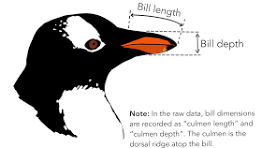

Como la variable "year" no es una características biológica ni ecológica de los pingüinos, la voy a quitar:

In [318]:
df = data_extended.copy()
df = df.drop(['year'], axis=1)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight
...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,44.0,20.4,252.0,6447.0,male,squid,adult,healthy
3426,Gentoo,Biscoe,54.5,25.2,245.0,6872.0,male,squid,adult,healthy
3427,Gentoo,Biscoe,51.4,20.4,258.0,7409.0,male,squid,adult,overweight
3428,Gentoo,Biscoe,55.9,20.5,247.0,6491.0,male,squid,adult,healthy


In [323]:
#creo una copia de esta versión del df que usaré más adelante para las conclusiones
df_island = df.copy()

4. Dividir entre categóricas y numéricas

In [321]:
# Obtiene los tipos de datos de las columnas
columnas_categóricas = list(df.select_dtypes(include=['object', 'category']).columns)
columnas_numéricas =   list(df.select_dtypes(include=['number']).columns)

print("Columnas catgóricas:", columnas_categóricas)
print("Columnas numéricas:", columnas_numéricas)

Columnas catgóricas: ['species', 'island', 'sex', 'diet', 'life_stage', 'health_metrics']
Columnas numéricas: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


Verificación de si hay valores faltantes:

En este caso, no hay ningún dato faltante dentro del dataset:

In [291]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
diet                 0
life_stage           0
health_metrics       0
dtype: int64

5. Análisis univariado categórico

Número de observaciones para cada registro de una variable categórica:

C:\Users\migue\AppData\Local\Temp\ipykernel_6248\3479547605.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax[i], palette="Set2")
C:\Users\migue\AppData\Local\Temp\ipykernel_6248\3479547605.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax[i], palette="Set2")
C:\Users\migue\AppData\Local\Temp\ipykernel_6248\3479547605.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax[i], palette="Set2")
C:\Users\migue\AppData\Local\Temp\ipykernel_6248\3479547605.py:7: FutureWarning

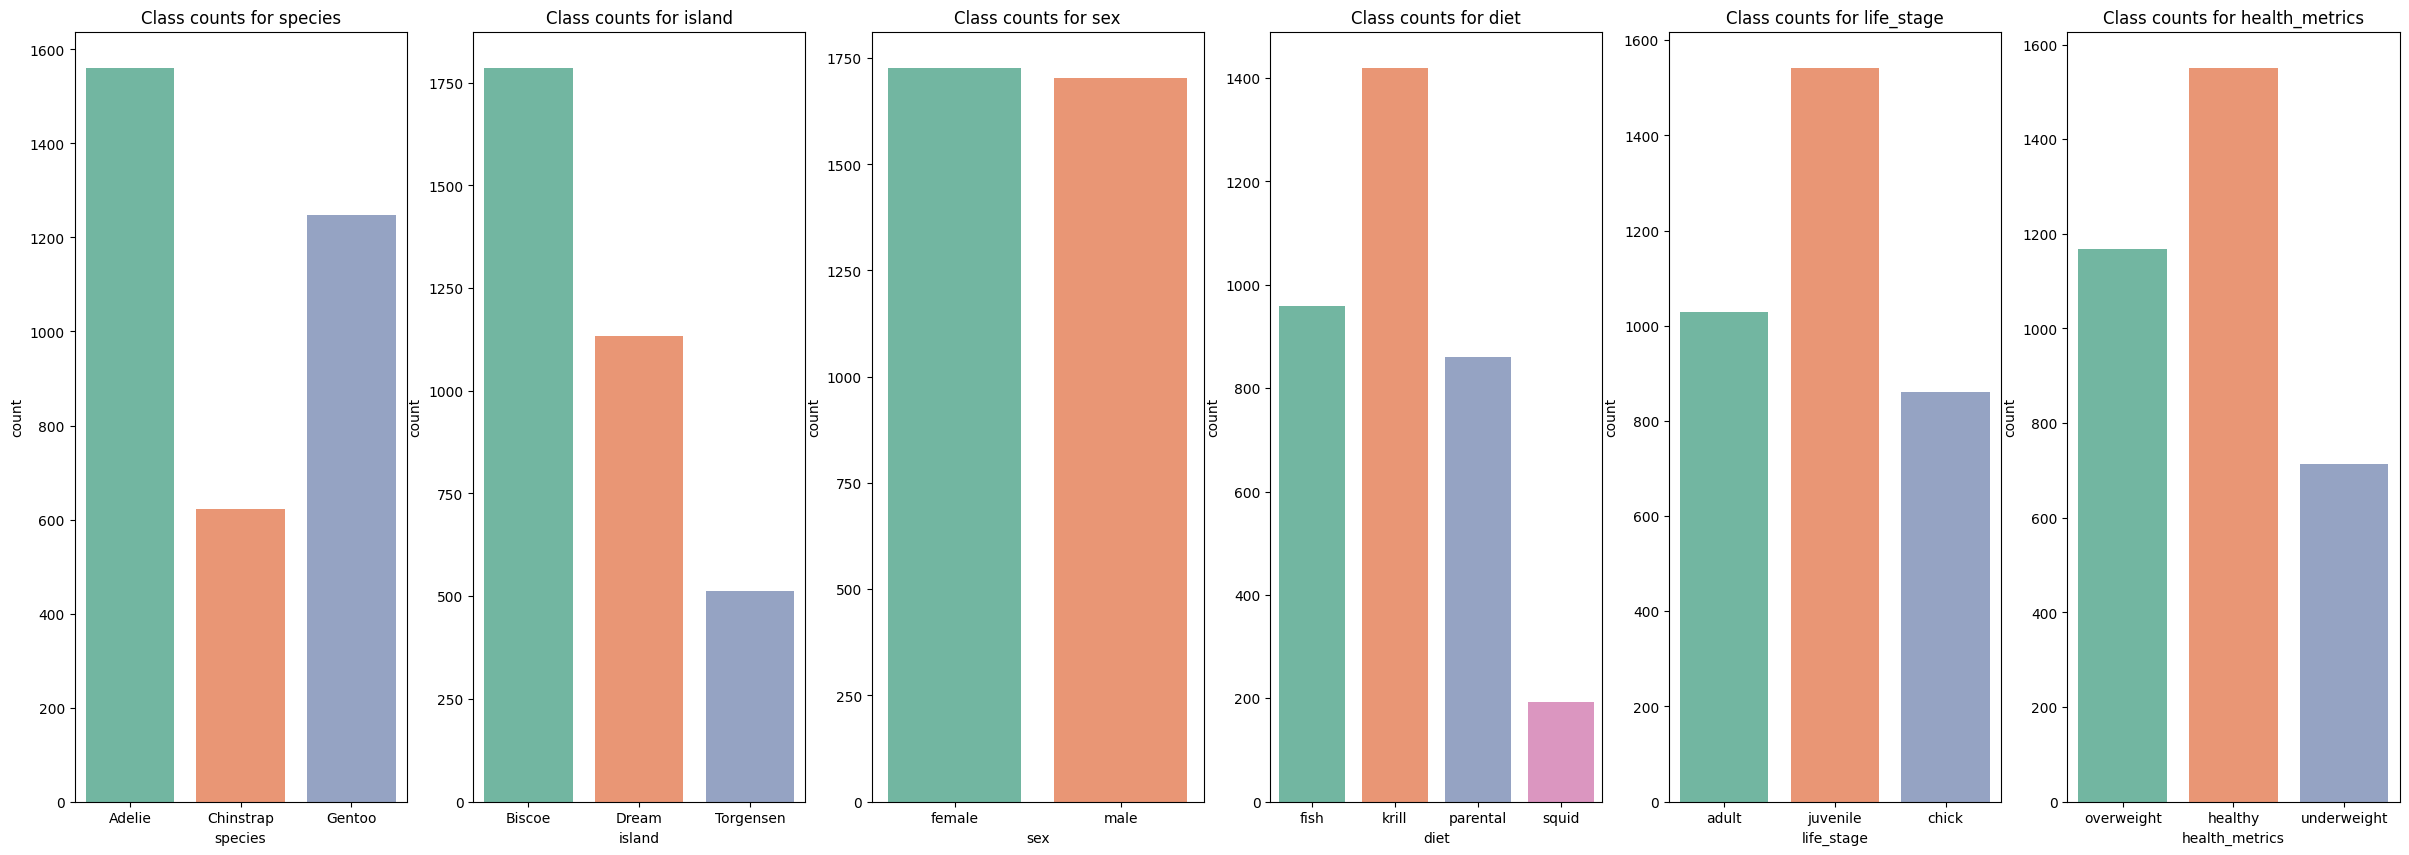

In [292]:
#Conteo de registros de las variables categóricas

cols = ['species', 'island', 'sex', 'diet', 'life_stage', 'health_metrics']
nCols = len(cols)
fig, ax = plt.subplots(1,nCols, figsize=(5*nCols,10))
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=ax[i], palette="Set2")
    ax[i].set_title('Class counts for ' + col)

In [25]:
#revisar los valores únicos
for columna in df.select_dtypes(include='object'):
    print(f"Columna {columna}:")
    print(df[columna].unique())

Columna species:
['Adelie' 'Chinstrap' 'Gentoo']
Columna island:
['Biscoe' 'Dream' 'Torgensen']
Columna sex:
['female' 'male']
Columna diet:
['fish' 'krill' 'parental' 'squid']
Columna life_stage:
['adult' 'juvenile' 'chick']
Columna health_metrics:
['overweight' 'healthy' 'underweight']


6. Análisis univariado numérico

Distribución de las variables numéricas

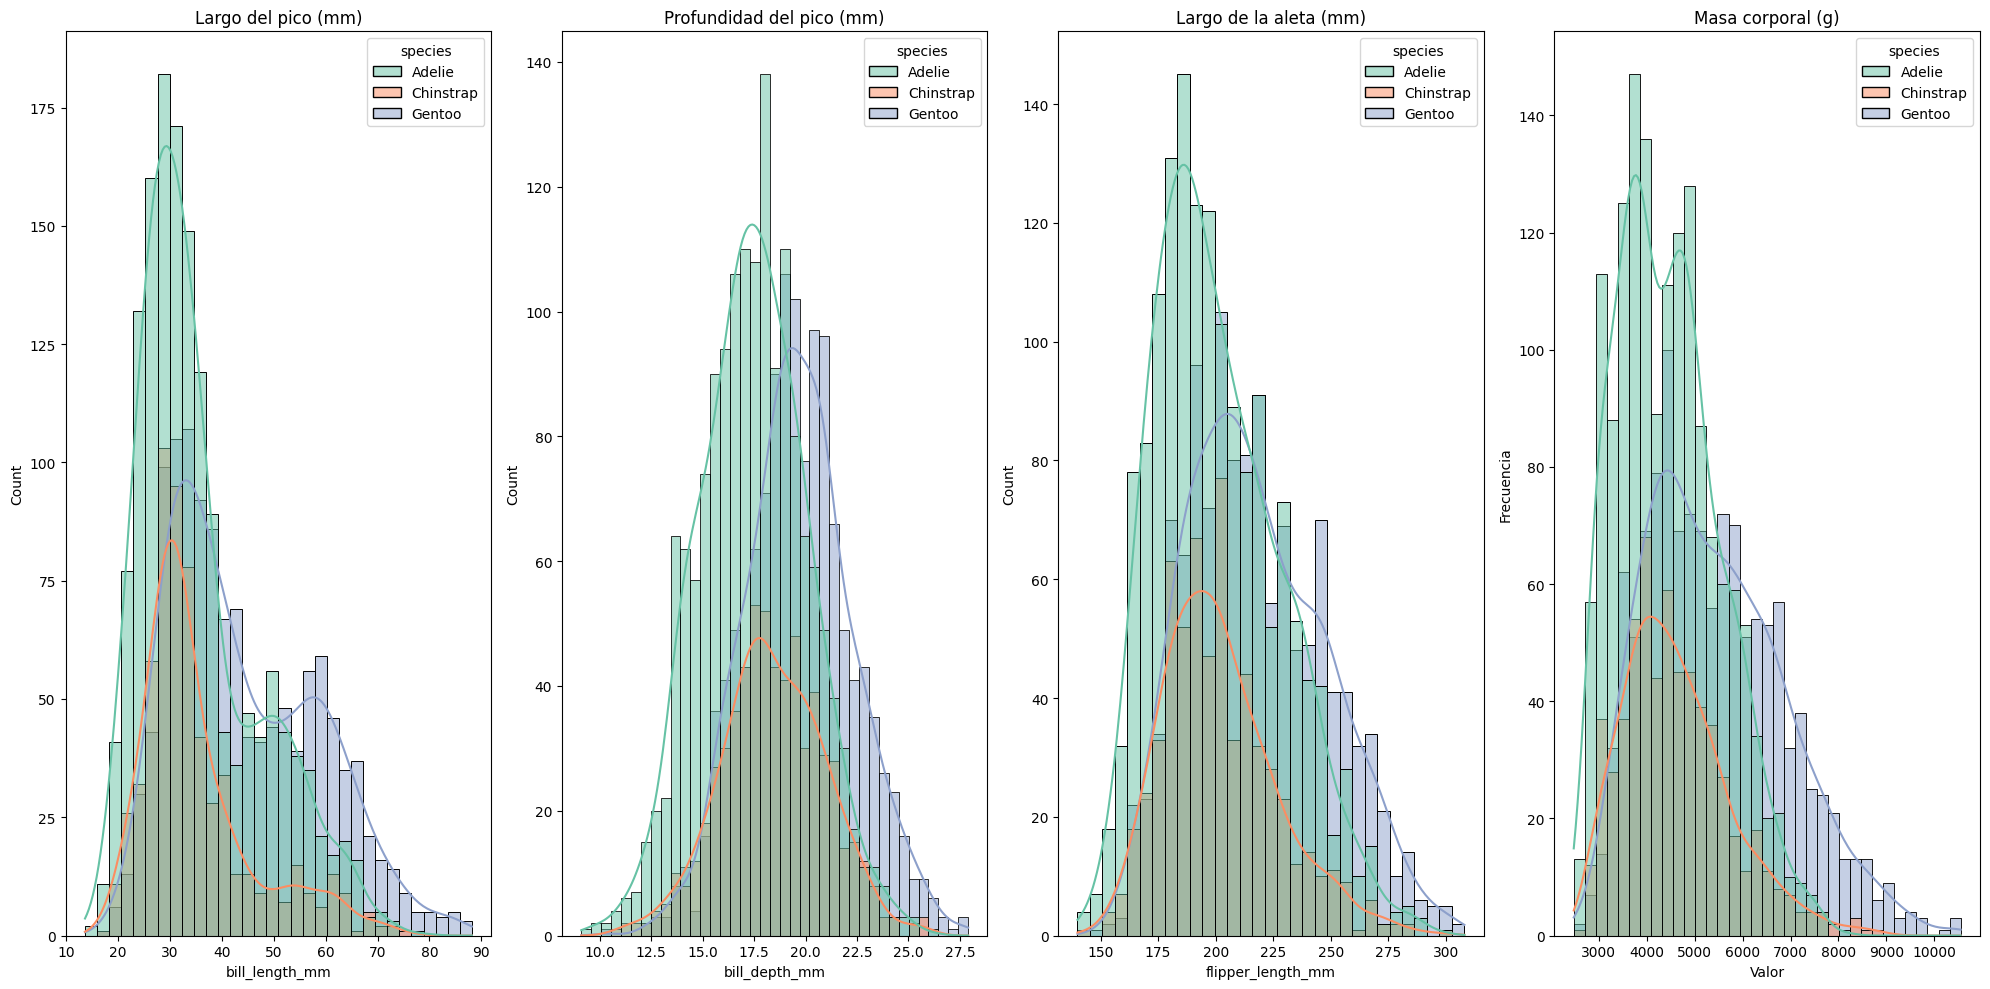

In [293]:
#Distribución de las variables numéricas discriminadas por la especie
cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
nCols = len(cols)
fig, ax = plt.subplots(1, nCols, figsize=(5*nCols, 10))

for i, col in enumerate(cols):
  # Crea el histograma con la opción kde=True para la línea de densidad
  sns.histplot(data=df, x=col, ax=ax[i], palette="Set2", kde=True, hue = "species")

# Ajusta los títulos y etiquetas (opcional)
# Puedes descomentar estas líneas para personalizar los títulos y etiquetas
ax[0].set_title('Largo del pico (mm)')
ax[1].set_title('Profundidad del pico (mm)')
ax[2].set_title('Largo de la aleta (mm)')
ax[3].set_title('Masa corporal (g)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.tight_layout()  # Ajusta el espacio entre subplots
plt.show()

In [235]:
#Mostrar estadísticos de las varibales numéricas

df.select_dtypes(include='number').describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,3430.000000,3430.000000,3430.000000,3430.000000
mean,38.529825,18.447143,207.028863,4834.710496
std,13.175171,2.774428,28.944765,1311.091310
min,13.600000,9.100000,140.000000,2477.000000
25%,28.900000,16.600000,185.000000,3843.500000
50%,34.500000,18.400000,203.000000,4633.500000
75%,46.600000,20.300000,226.000000,5622.000000
max,88.200000,27.900000,308.000000,10549.000000


In [31]:
#Tendencia central de las variables numéricas

# Seleccionar las variables numéricas
variables_numericas = df.select_dtypes(include='number')

# Calcular la media
media = variables_numericas.mean()

# Calcular la mediana
mediana = variables_numericas.median()

# Calcular la moda
moda = variables_numericas.mode()

# Imprimir los resultados
print("Media:\n", media)
print("\nMediana:\n", mediana)
print("\nModa:\n", moda)

Media:
 bill_length_mm         38.529825
bill_depth_mm          18.447143
flipper_length_mm     207.028863
body_mass_g          4834.710496
dtype: float64

Mediana:
 bill_length_mm         34.5
bill_depth_mm          18.4
flipper_length_mm     203.0
body_mass_g          4633.5
dtype: float64

Moda:
    bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            30.9           18.1              195.0       3581.0
1             NaN            NaN                NaN       3986.0
2             NaN            NaN                NaN       3990.0
3             NaN            NaN                NaN       4312.0


7.  Análisis de correlación entre variables

Como la variable "species" es una variable objetivo, marco los resultados de las gráficas de distribución con ella:

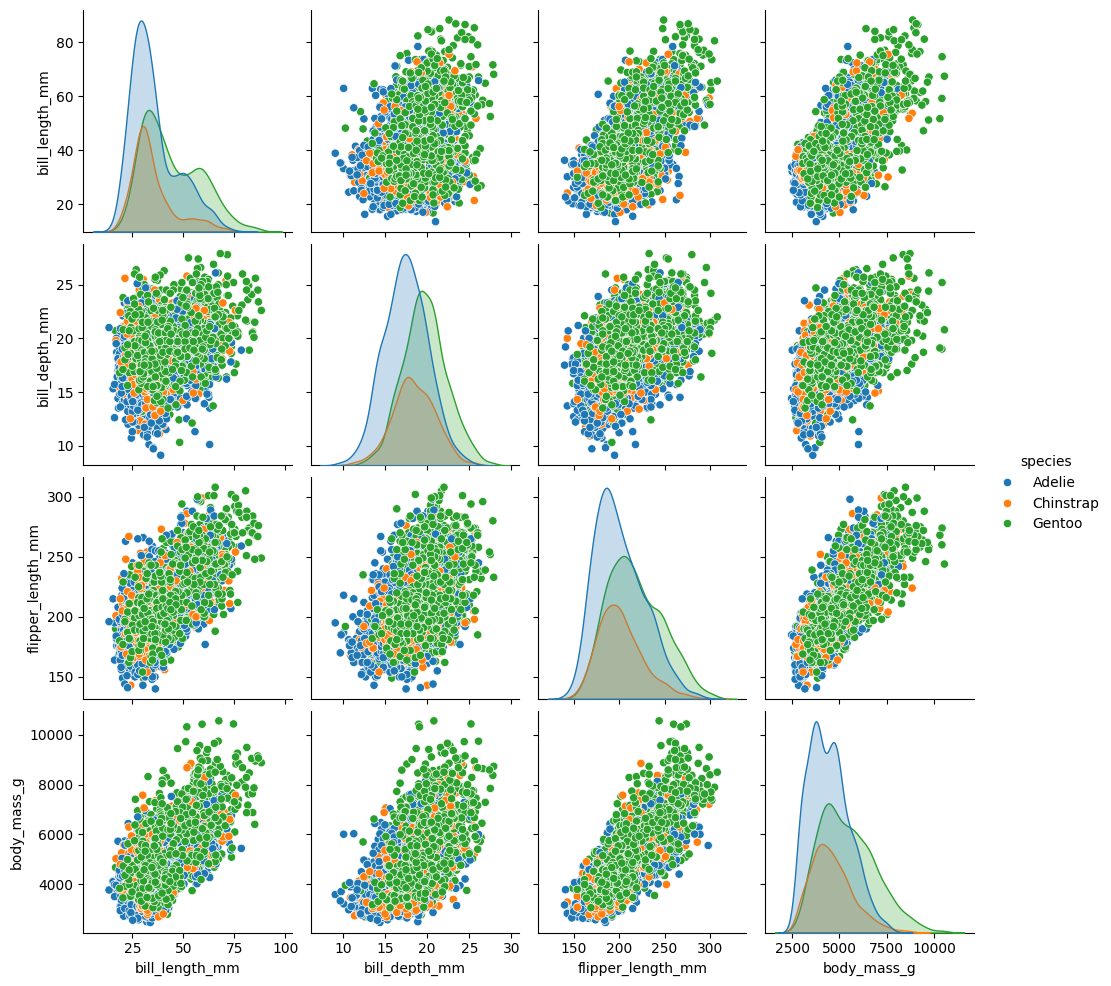

In [237]:
#gráficos de dispersiones y distribuciones por especie
sns.pairplot(data=df, hue='species' )

Se hace necesario convertir las variables categóricas a numéricas para hacer el análisis de correlaciones

In [294]:
#Convierte todas las variables categóricas en numéricas 
df['species'] = df['species'].replace({"Adelie": 0, "Chinstrap": 1, "Gentoo": 2})
df['species'] = df['species'].astype(int)

df['island'] = df['island'].replace({"Biscoe": 0, "Dream": 1, "Torgensen": 2})
df['island'] = df['island'].astype(int)

df['sex'] = df['sex'].replace({"female": 0, "male": 1})
df['sex'] = df['sex'].astype(int)

df['diet'] = df['diet'].replace({"fish": 0, "krill": 1, "parental": 2, "squid": 3})
df['diet'] = df['diet'].astype(int)

df['life_stage'] = df['life_stage'].replace({"adult": 0, "juvenile": 1, "chick": 2})
df['life_stage'] = df['life_stage'].astype(int)

df['health_metrics'] = df['health_metrics'].replace({"overweight": 0, "healthy": 1, "underweight": 2})
df['health_metrics'] = df['health_metrics'].astype(int)

C:\Users\migue\AppData\Local\Temp\ipykernel_6248\79250249.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace({"Adelie": 0, "Chinstrap": 1, "Gentoo": 2})
C:\Users\migue\AppData\Local\Temp\ipykernel_6248\79250249.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['island'] = df['island'].replace({"Biscoe": 0, "Dream": 1, "Torgensen": 2})
C:\Users\migue\AppData\Local\Temp\ipykernel_6248\79250249.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fut

Acá se calcula la correlación existente entre todas las variables que hacen parte de la base de datos

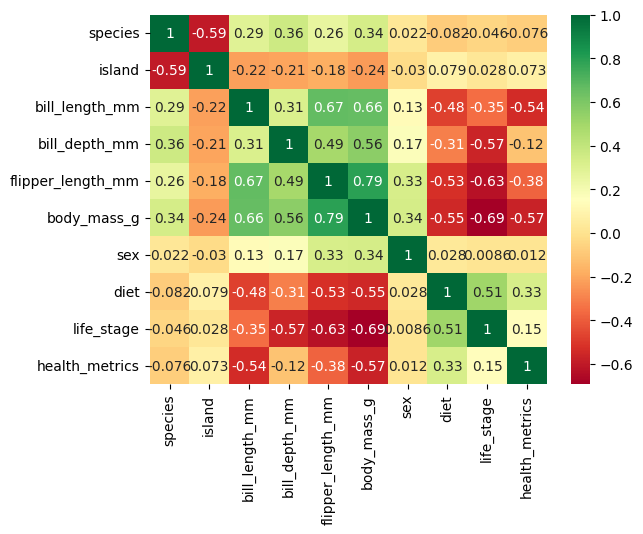

In [239]:
# Calcula la matriz de correlación
correlaciones = df.select_dtypes(include=["number"]).corr()

# Muestra la matriz de correlación
sns.heatmap(correlaciones, annot=True, cmap="RdYlGn")
plt.show()

8. Imputación de datos

Anteriormente habíamos corroborado que no habían valores faltantes en data_extended. Sin embargo, se debe corroborar si existen datos atípicos que podrían estar afectando las correlaciones.

C:\Users\migue\AppData\Local\Temp\ipykernel_6248\1605991683.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, ax=ax[i], palette="Set2")
C:\Users\migue\AppData\Local\Temp\ipykernel_6248\1605991683.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, ax=ax[i], palette="Set2")
C:\Users\migue\AppData\Local\Temp\ipykernel_6248\1605991683.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, ax=ax[i], palette="Set2")
C:\Users\migue\AppData\Local\Temp\ipykernel_6248\1605991683.py:6: FutureWarning: 

Pa

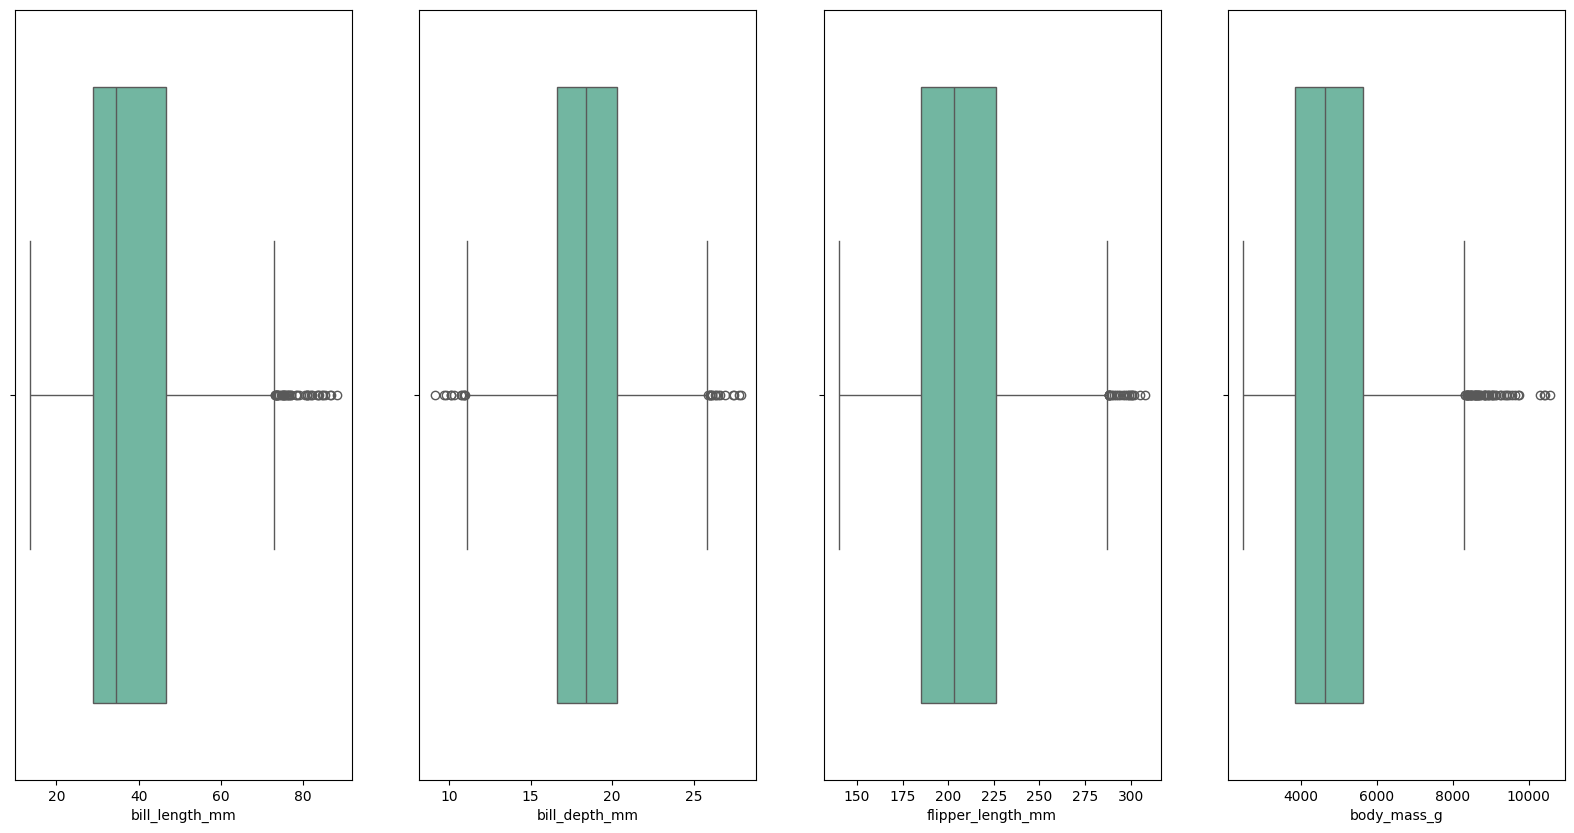

In [315]:
#boxplot para las variables numéricas; visualización de outliers
cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
nCols = len(cols)
fig, ax = plt.subplots(1,nCols, figsize=(5*nCols,10))
for i, col in enumerate(cols):
    sns.boxplot(data=df, x=col, ax=ax[i], palette="Set2")

Se hace necesario eliminar los outliers que puedan estar afectando las correlaciones de mis datos

In [296]:
#Se crea una copia del df destinada para borrar los outliers
df_1 = df.copy()

Se usa el método de z-score para eliminar los outliers de las columnas numéricas:

In [242]:
# Calcula el Z-score de cada valor de las variables numéricas
zscores = np.abs(stats.zscore(df_1))

# Define el umbral
umbral = 2.4

# Filtra los valores con Z-score mayor al umbral
df_outliers = df_1[zscores < umbral]
df_outliers

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics
0,0,0,53.4,17.8,219.0,5687.0,0,0,0,0
1,0,0,49.3,18.1,245.0,6811.0,0,0,0,0
2,0,0,55.7,16.6,226.0,5388.0,0,0,0,0
3,0,0,38.0,15.6,221.0,6262.0,0,0,0,0
4,0,0,60.7,17.9,177.0,4811.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3425,2,0,44.0,20.4,252.0,6447.0,1,3,0,1
3426,2,0,54.5,NaN,245.0,6872.0,1,3,0,1
3427,2,0,51.4,20.4,258.0,7409.0,1,3,0,0
3428,2,0,55.9,20.5,247.0,6491.0,1,3,0,1


Analizando visualmente, se evidencia la desaparición de lso outliers después de haber aplicado el método z-score:

C:\Users\migue\AppData\Local\Temp\ipykernel_6248\2275698042.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_outliers, x=col, ax=ax[i], palette="Set2")
C:\Users\migue\AppData\Local\Temp\ipykernel_6248\2275698042.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_outliers, x=col, ax=ax[i], palette="Set2")
C:\Users\migue\AppData\Local\Temp\ipykernel_6248\2275698042.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_outliers, x=col, ax=ax[i], palette="Set2")
C:\Users\migue\AppData\Local\Temp\ipykernel_6248\227569804

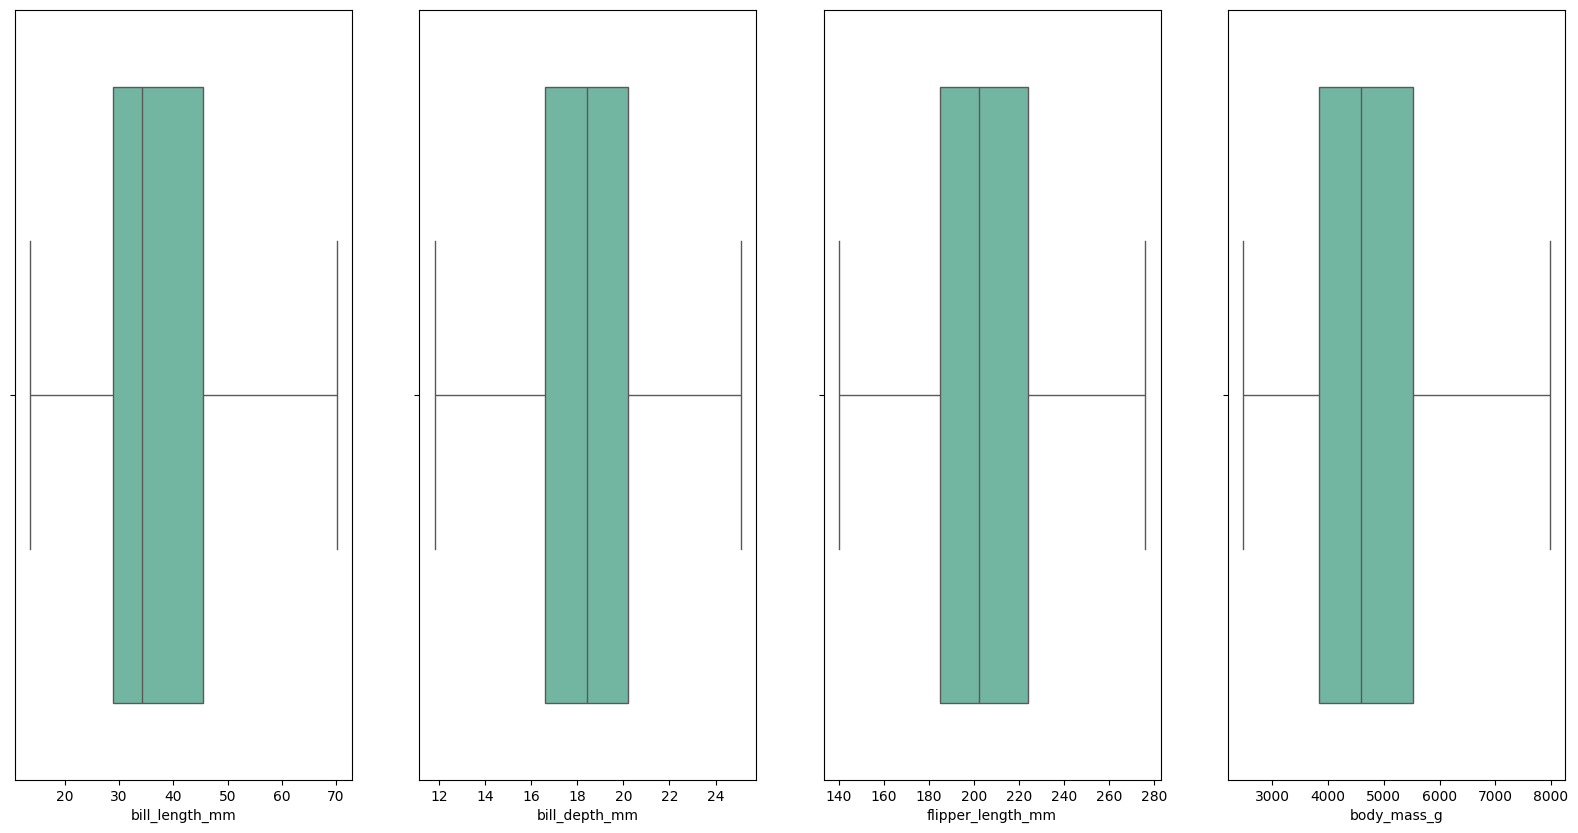

In [243]:
#boxplot para las variables numéricas
cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
nCols = len(cols)
fig, ax = plt.subplots(1,nCols, figsize=(5*nCols,10))
for i, col in enumerate(cols):
    sns.boxplot(data=df_outliers, x=col, ax=ax[i], palette="Set2")

No obstante, en la base de datos resultante (df_outliers) se ven reflejados los valores faltantes que son resultados de haber eliminado los outliers:

In [297]:
#Se corrobora que se hayan hecho eliminación de outliers
df_outliers.isna().sum()

species               0
island                0
bill_length_mm       70
bill_depth_mm        63
flipper_length_mm    56
body_mass_g          79
sex                   0
diet                  0
life_stage            0
health_metrics        0
dtype: int64

Por esta razón, se hace necesario hacer imputación. En este caso se hará la imputación usando la media:

In [298]:
#Imputa la media por columna
df_imputed = df_outliers.fillna(df_outliers.mean(axis=0))

#Se corrobora que se hayan rellenado todos los valores faltantes
df_imputed.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
diet                 0
life_stage           0
health_metrics       0
dtype: int64

Ahora, con las correcciones de outliers y la imputación, se hace de nuevo el análisis de correlaciones

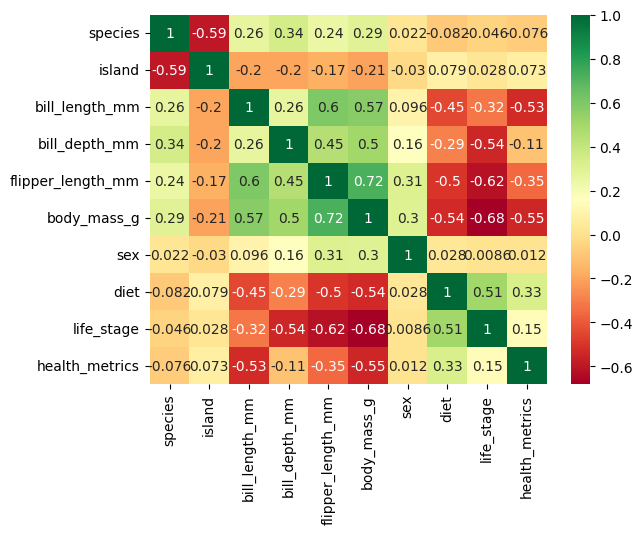

In [299]:
# Calcula la matriz de correlación
correlaciones = df_imputed.select_dtypes(include=["number"]).corr()

# Muestra la matriz de correlación
sns.heatmap(correlaciones, annot=True, cmap="RdYlGn")
plt.show()

9. Preparación de datos y entrenamiento del modelo predictivo

In [301]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df_imputed[["island", "bill_depth_mm"]]
y = df_imputed['species']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [302]:
#Entrenar un modelo de clasificación (usando Random Forest como ejemplo)
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Precisión del modelo: 0.71


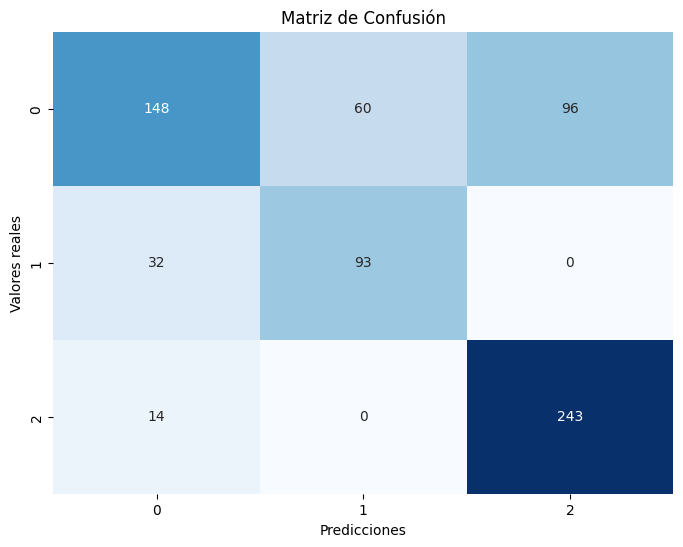


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.76      0.49      0.59       304
           1       0.61      0.74      0.67       125
           2       0.72      0.95      0.82       257

    accuracy                           0.71       686
   macro avg       0.70      0.73      0.69       686
weighted avg       0.72      0.71      0.69       686



In [303]:
# Evaluación del modelo
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")

# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)

10. Pipeline

En este apartado se utiliza un pipeline para automatizar el proceso de tratamiento de datos y calibrar la precisión del modelo

In [260]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df_imputed[["island", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex", "diet", "life_stage", "health_metrics"]]
y = df_imputed['species']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [261]:
#Se definen los métodos de transformación de y el parámetro clasificador
pipe = Pipeline([('scaler', StandardScaler()), ('decision_tree', RandomForestClassifier(random_state=42))], verbose = True)

# Ajustando los datos a la pipeline
pipe.fit(X_train, y_train)

print(accuracy_score(y_test, pipe.predict(X_test)))

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.5s
0.7915451895043731


En este apartado se utiliza el mismo método de transformación, pero utilizando otro parámetro clasificador:

In [262]:
#Se definen los métodos de transformación de y el parámetro clasificador
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
    ])


# Se aplican los pasos en el dataset de entrenamiento
pipe.fit(X_train, y_train)

# se aplican los pasos en el dataset de prueba
pipe.score(X_test, y_test)

print(accuracy_score(y_test, pipe.predict(X_test)))



0.8746355685131195


11. Conclusiones y consideraciones:



- Dando respuesta a la pregunta SMART: ¿Cuáles variables relacionadas con la biología y la ecología de 3 especies del género Pygoscelis tienen potencial para la construcción de un modelo predictivo de especie?

- De todas las disponibles, las variables "island" y "bill_depth_mm" resultaron tener el mayor potencial para la predicción de la especie del género Pygoscelis

- La precisión del modelo no resulta ser lo suficientemente confiable (0.71)

- Se debe considerar la posibilidad de migraciones de pingüinos entre islas. Este hecho va a hacer que el modelo  entrenado con este dataset cometa errores de predicción con otros datos registrados

- La variable "island" resulta tener la mayor correlación con la "species" porque hay especies que al parecer son únicas de una isla

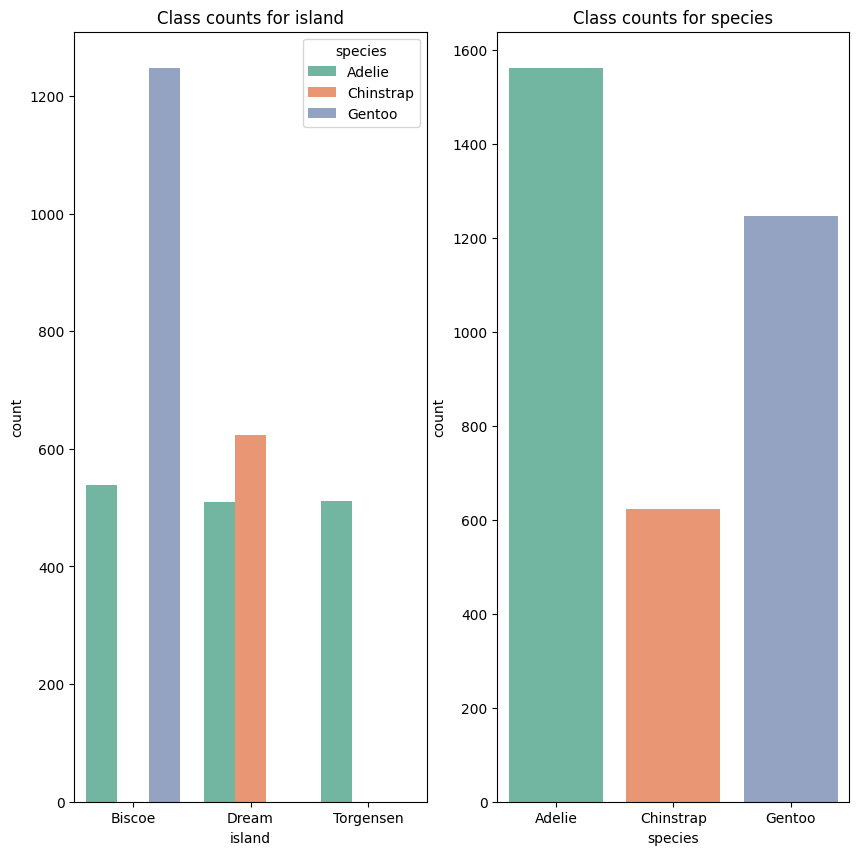

In [322]:
#Conteo de registros de las variables categóricas

cols = ['island', 'species']
nCols = len(cols)
fig, ax = plt.subplots(1,nCols, figsize=(5*nCols,10))
for i, col in enumerate(cols):
    sns.countplot(data=df_island, x=col, ax=ax[i], palette="Set2", hue="species")
    ax[i].set_title('Class counts for ' + col)


- Desde un punto de vista biológico, resulta difícil tener precisión en la predicción de una especie a partir de características tan variables como lo son las morfológicas (además considerando que son especies pertenecientes a un mismo género)